In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_train_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_train/seg_train'
data_test_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_test/seg_test'
data_val_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_pred/seg_val/seg_val'

In [5]:
img_width = 180
img_height =180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3422 files belonging to 6 classes.


In [9]:
data_set = data_train.class_names

In [10]:
data_set

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [11]:
ls "{data_val_path}"

buildings/  forest/  glacier/  mountain/  sea/  street/


In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 358 files belonging to 6 classes.


In [13]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 759 files belonging to 6 classes.


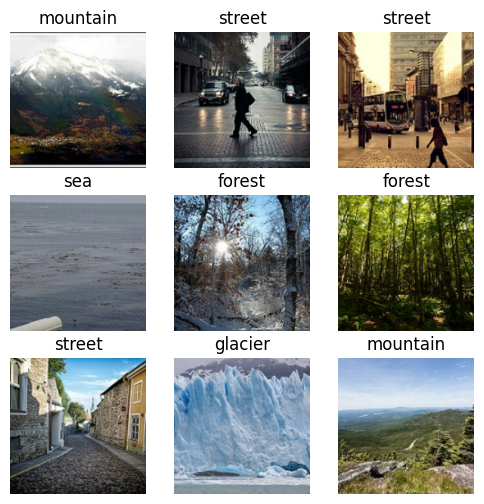

In [14]:
plt.figure(figsize=(6,6))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_set[labels[i]])
        plt.axis('off')

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#with Padding
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(16,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(8,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │         125,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,774 (514.74 KB)

 Trainable params: 131,774 (514.74 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

# Flatten and Fully Connected layers
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(data_set), activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,358,054 (16.62 MB)

 Trainable params: 4,358,054 (16.62 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


107/107 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.3294 - loss: 2.0066 - val_accuracy: 0.5866 - val_loss: 1.0835
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.5988 - loss: 1.0397 - val_accuracy: 0.6229 - val_loss: 0.9651
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6693 - loss: 0.8690 - val_accuracy: 0.6844 - val_loss: 0.9258
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7531 - loss: 0.6970 - val_accuracy: 0.7039 - val_loss: 0.8174
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8043 - loss: 0.5545 - val_accuracy: 0.6788 - val_loss: 0.8501
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8518 - loss: 0.4064 - val_accuracy: 0.6732 - val_loss: 1.0071
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8931 - loss: 0.3002 - val_accuracy: 0.6257 - val_loss: 1.1635
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9320 - loss: 0.2098 - val_accuracy: 0.662

Text(0.5, 1.0, 'Loss')

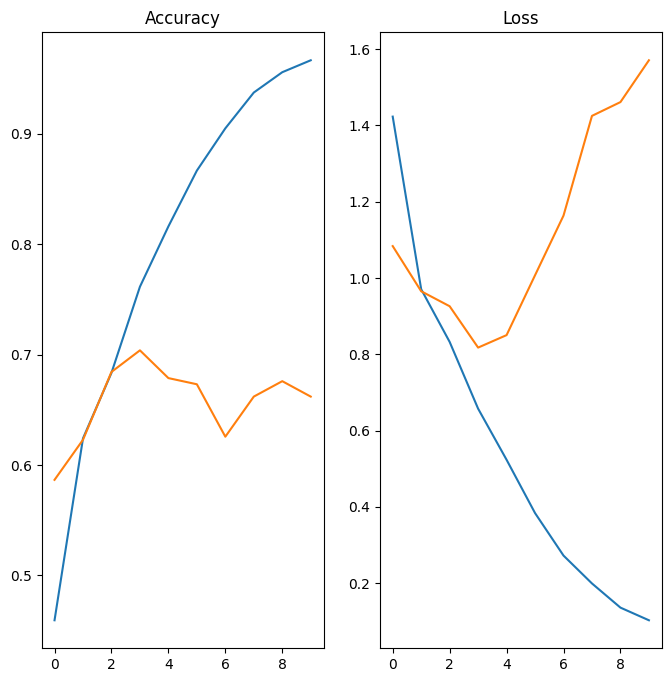

In [33]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [34]:
# Predictions and metrics
y_true = []
y_pred = []

for images, labels in data_test:
    preds = tf.argmax(model.predict(images), axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


In [35]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6517967917011338
Recall: 0.6548089591567853
F1 Score: 0.6458748569350043


In [36]:
# Classification report
print(classification_report(y_true, y_pred, target_names=data_cat))

              precision    recall  f1-score   support

   buildings       0.58      0.59      0.59       106
      forest       0.74      0.96      0.84       128
     glacier       0.67      0.71      0.69       163
    mountain       0.66      0.51      0.57       136
         sea       0.65      0.45      0.53       112
      street       0.59      0.68      0.63       114

    accuracy                           0.65       759
   macro avg       0.65      0.65      0.64       759
weighted avg       0.65      0.65      0.65       759



In [37]:
# Test a single image
image_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_test/seg_test/glacier/20087.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_width, img_height))
img_array = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_batch)
predicted_class = data_cat[np.argmax(predictions)]
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The predicted class is: glacier


In [38]:
print('This image is of a Natural scene of {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(predictions)],np.max(predictions)*10))

This image is of a Natural scene of glacier with accuracy of 9.99


In [39]:
image = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_test/seg_test/street/20194.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_batch=tf.expand_dims(img_arr,0)

predictions = model.predict(img_batch)
predicted_class = data_cat[np.argmax(predictions)]
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
The predicted class is: street
